In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, add_dummy_feature, PolynomialFeatures
from sklearn.linear_model import LogisticRegression, ElasticNet, Lasso, Ridge, LinearRegression, SGDRegressor
import matplotlib as mpl
from math import ceil
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import learning_curve, train_test_split
from sklearn.datasets import load_iris


# Linear Regression

In [31]:
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1)
y = 4 + 3 * X + np.random.randn(m, 1)

(0.0, 2.0, 0.0, 15.0)

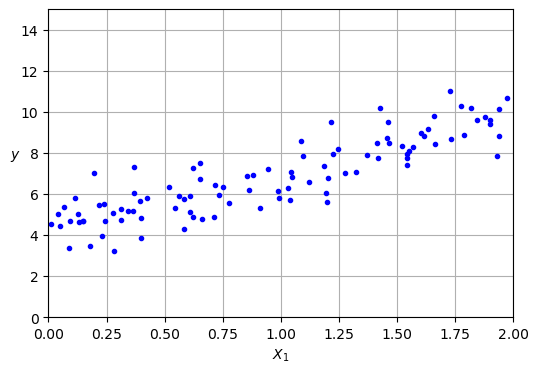

In [32]:
plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.grid()
plt.xlabel("$X_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])

In [33]:
X_b = add_dummy_feature(X)
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

In [34]:
X

array([[0.74908024],
       [1.90142861],
       [1.46398788],
       [1.19731697],
       [0.31203728],
       [0.31198904],
       [0.11616722],
       [1.73235229],
       [1.20223002],
       [1.41614516],
       [0.04116899],
       [1.9398197 ],
       [1.66488528],
       [0.42467822],
       [0.36364993],
       [0.36680902],
       [0.60848449],
       [1.04951286],
       [0.86389004],
       [0.58245828],
       [1.22370579],
       [0.27898772],
       [0.5842893 ],
       [0.73272369],
       [0.91213997],
       [1.57035192],
       [0.39934756],
       [1.02846888],
       [1.18482914],
       [0.09290083],
       [1.2150897 ],
       [0.34104825],
       [0.13010319],
       [1.89777107],
       [1.93126407],
       [1.6167947 ],
       [0.60922754],
       [0.19534423],
       [1.36846605],
       [0.88030499],
       [0.24407647],
       [0.99035382],
       [0.06877704],
       [1.8186408 ],
       [0.51755996],
       [1.32504457],
       [0.62342215],
       [1.040

In [35]:
X_b

array([[1.        , 0.74908024],
       [1.        , 1.90142861],
       [1.        , 1.46398788],
       [1.        , 1.19731697],
       [1.        , 0.31203728],
       [1.        , 0.31198904],
       [1.        , 0.11616722],
       [1.        , 1.73235229],
       [1.        , 1.20223002],
       [1.        , 1.41614516],
       [1.        , 0.04116899],
       [1.        , 1.9398197 ],
       [1.        , 1.66488528],
       [1.        , 0.42467822],
       [1.        , 0.36364993],
       [1.        , 0.36680902],
       [1.        , 0.60848449],
       [1.        , 1.04951286],
       [1.        , 0.86389004],
       [1.        , 0.58245828],
       [1.        , 1.22370579],
       [1.        , 0.27898772],
       [1.        , 0.5842893 ],
       [1.        , 0.73272369],
       [1.        , 0.91213997],
       [1.        , 1.57035192],
       [1.        , 0.39934756],
       [1.        , 1.02846888],
       [1.        , 1.18482914],
       [1.        , 0.09290083],
       [1.

In [36]:
theta_best

array([[4.21509616],
       [2.77011339]])

In [37]:
X_new = np.array([[0], [2], [1]])
X_new_b = add_dummy_feature(X_new)
y_predict = X_new_b @ theta_best
y_predict

array([[4.21509616],
       [9.75532293],
       [6.98520954]])

(0.0, 2.0, 0.0, 14.0)

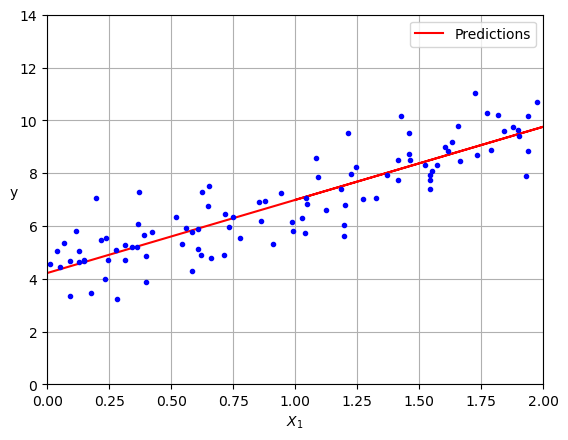

In [38]:
plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.plot(X, y, "b.")
plt.grid()
plt.legend()
plt.xlabel("$X_1$")
plt.ylabel("y", rotation=0)
plt.axis([0, 2, 0, 14])

In [39]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [40]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293],
       [6.98520954]])

In [41]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

In [42]:
np.linalg.pinv(X_b) @ y

array([[4.21509616],
       [2.77011339]])

# Batch Gradient Descent

In [43]:
eta = 0.1
n_epochs = 1000
m = len(X_b)

np.random.seed(42)
theta = np.random.randn(2, 1)

In [44]:
for epoch in range(n_epochs):
  gradients = 2 / m * X_b.T @ (X_b @ theta - y)
  theta = theta - eta * gradients

In [45]:
theta

array([[4.21509616],
       [2.77011339]])

In [46]:
def plot_gradient_descent(theta, eta):
  m = len(X_b)
  plt.plot(X, y, "b.")
  n_epochs = 1000
  n_shown = 20
  theta_path = []

  for epoch in range(n_epochs):
    if epoch < n_shown: 
      y_predict = X_new_b @ theta
      color = mpl.colors.rgb2hex(plt.cm.OrRd(epoch / n_shown + 0.15))
      plt.plot(X_new, y_predict, linestyle="solid", color=color)
    gradients = 2 / m * X_b.T @ (X_b @ theta -y)
    theta = theta - eta * gradients
    theta_path.append(theta)
  plt.xlabel("$X_1$")
  plt.axis([0, 2, 0, 15])
  plt.grid()
  plt.title(fr"$\eta = {eta}$")

  return theta_path

[Text(0, 0.0, ''),
 Text(0, 2.0, ''),
 Text(0, 4.0, ''),
 Text(0, 6.0, ''),
 Text(0, 8.0, ''),
 Text(0, 10.0, ''),
 Text(0, 12.0, ''),
 Text(0, 14.0, ''),
 Text(0, 16.0, '')]

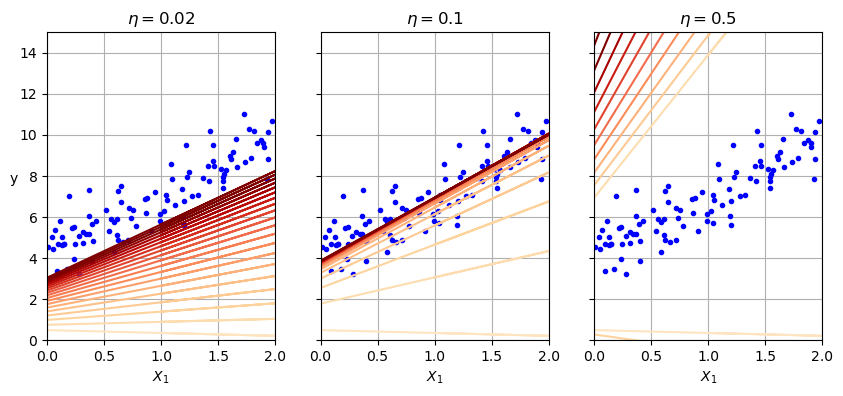

In [47]:
np.random.seed(42)
theta = np.random.randn(2, 1)

plt.figure(figsize=(10, 4))
plt.subplot(131)
theta_path_bgd = plot_gradient_descent(theta, eta=0.02)
plt.ylabel("y", rotation=0)

plt.subplot(132)
plot_gradient_descent(theta, eta=0.1)
plt.gca().axes.yaxis.set_ticklabels([])

plt.subplot(133)
plot_gradient_descent(theta, eta=0.5)
plt.gca().axes.yaxis.set_ticklabels([])

# Stochastic Gradient Descent

In [48]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
  return t0 / (t+t1)

np.random.seed(42)
theta = np.random.randn(2, 1)

In [49]:
for epoch in range(n_epochs):
  for iteration in range(m):
    random_index = np.random.randint(m)
    xi = X_b[random_index : random_index+1]
    yi = y[random_index : random_index+1]
    gradients = 2 * xi.T @ (xi @ theta - yi)
    eta = learning_schedule(epoch * m + iteration)
    theta = theta - eta * gradients

In [50]:
theta

array([[4.21076011],
       [2.74856079]])

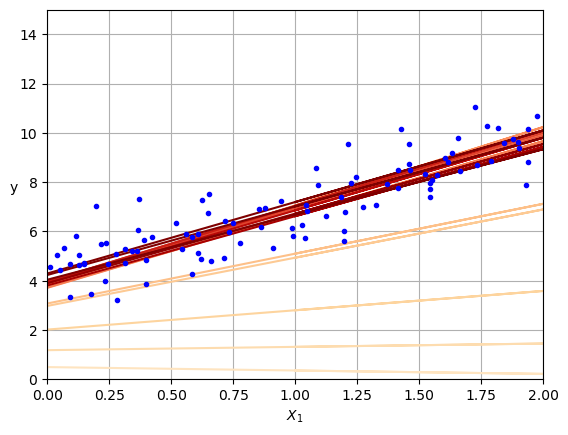

In [51]:
n_epochs = 50
t0, t1 = 5, 50
theta_path_sgd = []

def learning_schedule(t):
  return t0 / (t+t1)

np.random.seed(42)
theta = np.random.randn(2, 1)

n_shown = 20

for epoch in range(n_epochs):
  for iteration in range(m):
    if epoch == 0 and iteration < n_shown:
      y_predict = X_new_b @ theta
      color = mpl.colors.rgb2hex(plt.cm.OrRd(iteration / n_shown + 0.15))
      plt.plot(X_new, y_predict, color=color)
    
    random_index = np.random.randint(m)
    xi = X_b[random_index:random_index+1]
    yi = y[random_index:random_index+1]
    gradients = 2*xi.T @ (xi@theta-yi)
    eta = learning_schedule(epoch * m + iteration)
    theta = theta - eta * gradients
    theta_path_sgd.append(theta)

plt.plot(X, y, "b.")
plt.xlabel("$X_1$")
plt.ylabel("y", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()

In [52]:
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-5, penalty=None, eta0=0.01,
                      n_iter_no_change=100, random_state=42)

In [53]:
sgd_reg.fit(X, y.ravel())

SGDRegressor(n_iter_no_change=100, penalty=None, random_state=42, tol=1e-05)

In [54]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.21278812]), array([2.77270267]))

# Mini-Batch Gradient Descent

In [55]:
n_epochs = 50
minibatch_size = 20
n_batches_per_epoch = ceil(m/minibatch_size)
theta_path_mgd = []

np.random.seed(42)
theta = np.random.randn(2, 1)
t0, t1 = 200, 1000

def learning_schedulte(t):
  return t0 / (t+t1)

for epoch in range(n_epochs):
  shuffled_indices = np.random.permutation(m)
  X_b_shuffled = X_b[shuffled_indices]
  y_shuffled = y[shuffled_indices]
  for iteration in range(0, n_batches_per_epoch):
    idx = iteration * minibatch_size
    xi = X_b_shuffled[idx : idx+minibatch_size]
    yi = y_shuffled[idx : idx+minibatch_size]
    gradients = 2 / minibatch_size * xi.T @ (xi@theta-yi)
    eta = learning_schedule(iteration)
    theta = theta - eta * gradients

In [56]:
theta

array([[4.2857119],
       [2.8119161]])

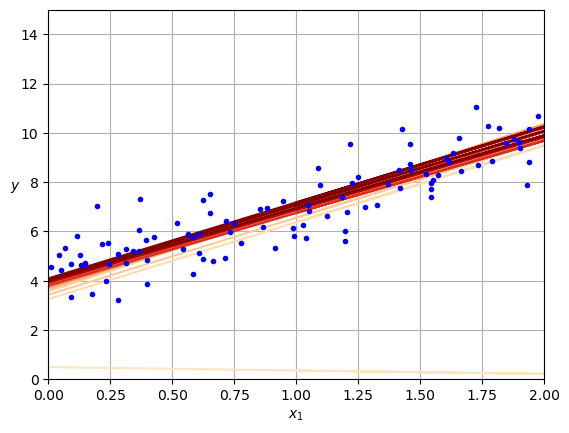

In [57]:
np.random.seed(42)
theta = np.random.randn(2, 1)
n_shown = 20
iter = 0

for epoch in range(n_epochs):
  shuffled_indices = np.random.permutation(m)
  X_b_shuffled = X_b[shuffled_indices]
  y_shuffled = y[shuffled_indices]
  
  for iteration in range(0, n_batches_per_epoch):
    if iter < n_shown:
      y_predict = X_new_b @ theta
      color = mpl.colors.rgb2hex(plt.cm.OrRd(iter / n_shown + 0.15))
      plt.plot(X_new, y_predict, color=color)
      iter += 1

    idx = iteration * minibatch_size
    xi = X_b_shuffled[idx : idx+minibatch_size]
    yi = y_shuffled[idx : idx+minibatch_size]
    gradients = 2 / minibatch_size * xi.T @ (xi@theta-yi)
    eta = learning_schedule(iteration)
    theta = theta - eta * gradients
    theta_path_mgd.append(theta)

plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()

In [58]:
bgd = np.array(theta_path_bgd)
sgd = np.array(theta_path_sgd)
mgd = np.array(theta_path_mgd)

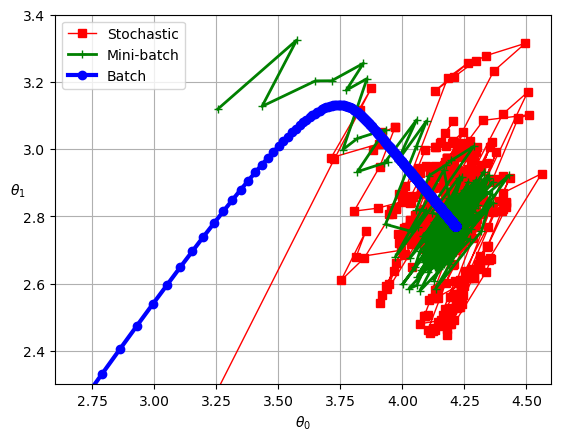

In [59]:
plt.plot(sgd[:, 0], sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(mgd[:, 0], mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(bgd[:, 0], bgd[:, 1], "b-o", linewidth=3, label="Batch")

plt.legend()
plt.xlabel(r"$\theta_0$")
plt.ylabel(r"$\theta_1$", rotation=0)
plt.axis([2.6, 4.6, 2.3, 3.4])
plt.grid()

# Polynomial Regression

Text(0.5, 1.0, 'Nonlinear data')

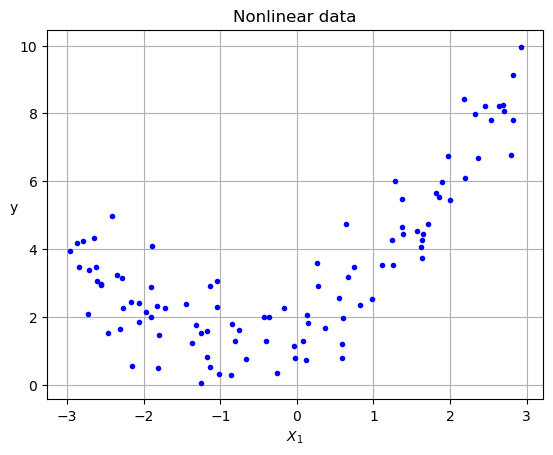

In [60]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

plt.plot(X, y, "b.")
plt.grid()
plt.xlabel("$X_1$")
plt.ylabel("y", rotation=0)
plt.title("Nonlinear data")

In [61]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.75275929])

In [62]:
X_poly[0]

array([-0.75275929,  0.56664654])

In [63]:
lin_reg1 = LinearRegression()
lin_reg1.fit(X, y)
lin_reg1.intercept_, lin_reg1.coef_

(array([3.56401543]), array([[0.84362064]]))

In [64]:
lin_reg2 = LinearRegression()
lin_reg2.fit(X_poly, y)
lin_reg2.intercept_, lin_reg2.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

In [65]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)

y_new1 = lin_reg1.predict(X_new)
y_new2 = lin_reg2.predict(X_new_poly)

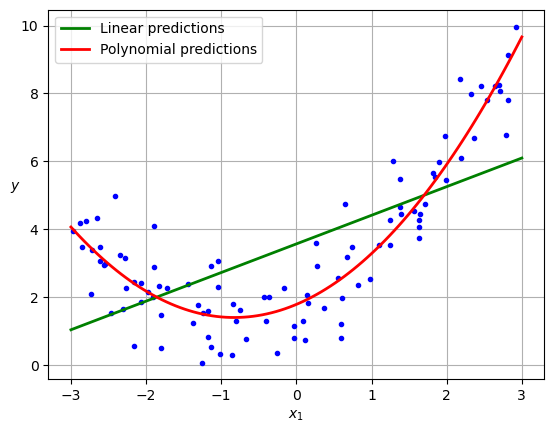

In [66]:
plt.plot(X, y, "b.")
plt.plot(X_new, y_new1, "g-", linewidth=2, label="Linear predictions")
plt.plot(X_new, y_new2, "r-", linewidth=2, label="Polynomial predictions")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.grid()
plt.legend()

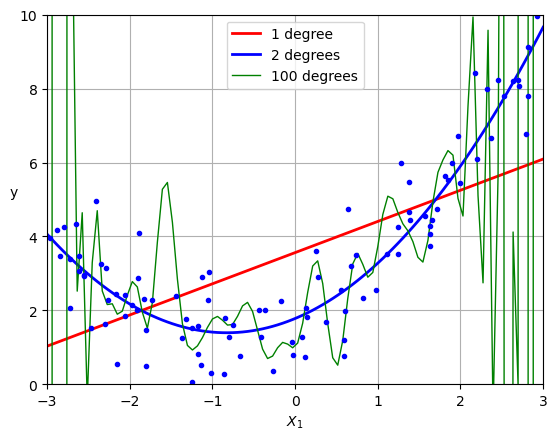

In [67]:
plt.figure()

for style, width, degree in (("r-", 2, 1), ("b-", 2, 2), ("g-", 1, 100)):
  polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
  std_scaler = StandardScaler()
  lin_reg = LinearRegression()
  polynomial_regression = make_pipeline(polybig_features, std_scaler, lin_reg)
  polynomial_regression.fit(X, y)
  y_newbig = polynomial_regression.predict(X_new)
  label = f"{degree} degree{'s' if degree > 1 else ''}"
  plt.plot(X_new, y_newbig, style, label=label, linewidth=width)

  
plt.plot(X, y, "b.", linewidth=3)
plt.legend()
plt.xlabel("$X_1$")
plt.ylabel("y", rotation=0)
plt.axis([-3, 3, 0, 10])
plt.grid()

# Learning Curves

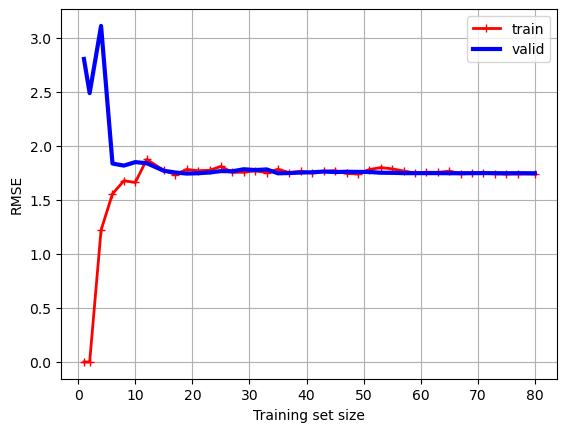

In [68]:
train_sizes, train_scores, valid_scores = learning_curve(
  LinearRegression(), X, y, train_sizes=np.linspace(0.01, 1.0, 40),
  cv=5, scoring="neg_root_mean_squared_error"
)
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")

plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.legend()
plt.grid()

(0.0, 80.0, 0.0, 5.0)

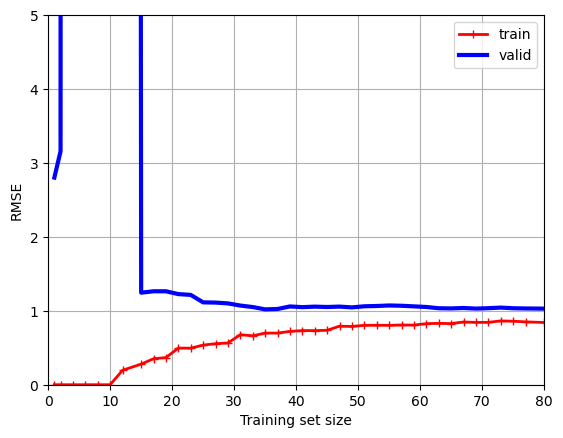

In [69]:
polynomial_regression = make_pipeline(
  PolynomialFeatures(degree=10, include_bias=False),
  LinearRegression()
)

train_sizes, train_scores, valid_scores = learning_curve(
  polynomial_regression, X, y, train_sizes=np.linspace(0.01, 1.0, 40),
  cv=5, scoring="neg_root_mean_squared_error"
)
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")

plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.legend()
plt.grid()
plt.axis([0, 80, 0, 5])

# Ridge Regression

In [70]:
np.random.seed(42)

m = 20
X = 3 * np.random.rand(m,1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

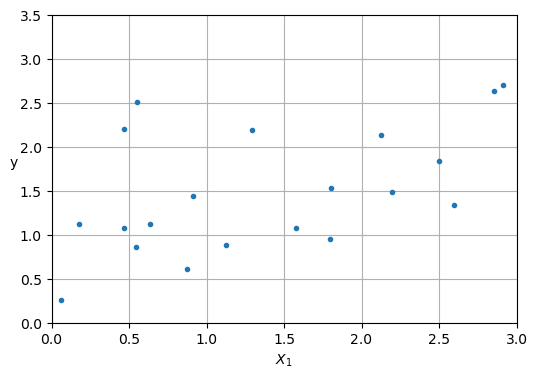

In [71]:
plt.figure(figsize=(6, 4))
plt.plot(X, y, ".")
plt.xlabel("$X_1$")
plt.ylabel("y", rotation=0)
plt.axis([0, 3, 0, 3.5])
plt.grid()

In [72]:
ridge_reg = Ridge(alpha=0.1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55325833]])

In [73]:
def plot_model(model_class, polynomial, alphas, **model_kwargs):
  plt.plot(X, y, "b.", linewidth=3)
  for alpha, style in zip(alphas, ("b:", "g--", "r-")):
    if alpha > 0:
      model = model_class(alpha, **model_kwargs)
    else:
      model = LinearRegression()

    if polynomial:
      model = make_pipeline(
        PolynomialFeatures(degree=10, include_bias=False),
        StandardScaler(),
        model
      )
    model.fit(X, y)
    y_new_regul = model.predict(X_new)
    plt.plot(X_new, y_new_regul, style, linewidth=2,
            label=fr"$\alpha = {alpha}$")

  plt.legend(loc="upper left")
  plt.xlabel("$x_1$")
  plt.axis([0, 3, 0, 3.5])
  plt.grid()  

Text(0.5, 1.0, 'Polonomial')

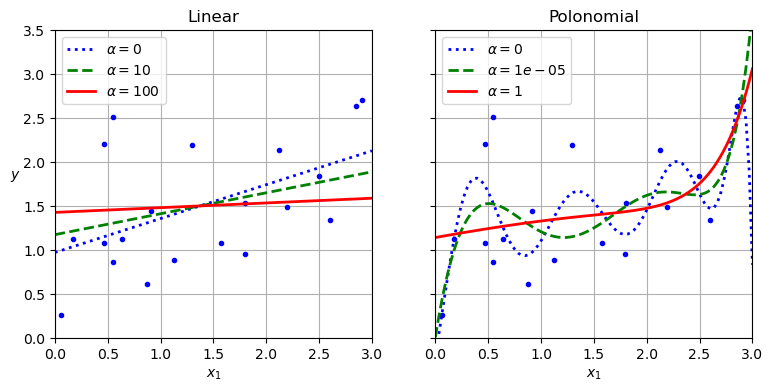

In [74]:
plt.figure(figsize=(9, 4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$  ", rotation=0)
plt.title("Linear")

plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)
plt.gca().axes.yaxis.set_ticklabels([])
plt.title("Polonomial")

In [75]:
sgd_reg = SGDRegressor(penalty="l2", alpha=0.1/m, tol=None,
                      max_iter = 1000, eta0=0.01, random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.55302613])

# Lasso Regression

In [76]:
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

Text(0.5, 1.0, 'Polynomial')

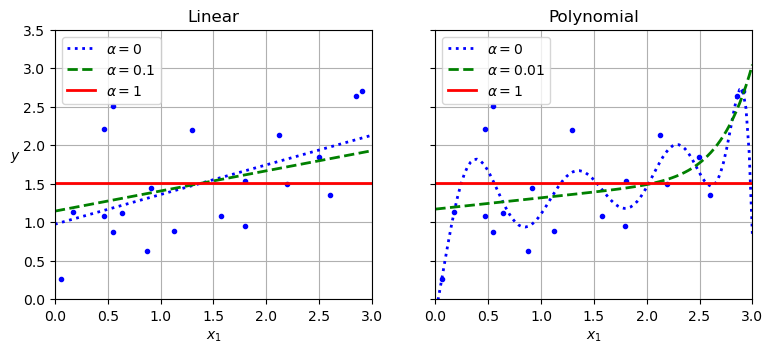

In [77]:
plt.figure(figsize=(9, 3.5))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$  ", rotation=0)
plt.title("Linear")

plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 1e-2, 1), random_state=42)
plt.gca().axes.yaxis.set_ticklabels([])
plt.title("Polynomial")

# Elastic Net Regression

In [78]:
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])

# Logistic Regression

In [79]:
iris = load_iris(as_frame=True)
list(iris)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [80]:
iris.data.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

In [81]:
iris.target.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [82]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [83]:
X = iris.data[["petal width (cm)"]].values
y = iris.target_names[iris.target] == "virginica"

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [85]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [86]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0, 0]

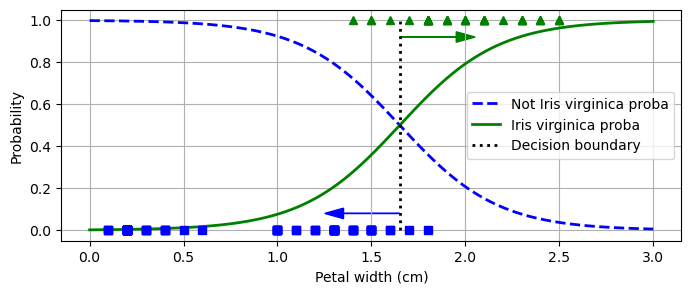

In [87]:
plt.figure(figsize=(8, 3))

plt.arrow(x=decision_boundary, y=0.08, dx=-0.3, dy=0,
          head_width=0.05, head_length=0.1, fc="b", ec="b")
plt.arrow(x=decision_boundary, y=0.92, dx=0.3, dy=0,
          head_width=0.05, head_length=0.1, fc="g", ec="g")

plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica proba")
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica proba")
plt.plot([decision_boundary, decision_boundary], [0, 1], "k:", linewidth=2, label="Decision boundary")
plt.plot(X_train[y_train == 0], y_train[y_train == 0], "bs")
plt.plot(X_train[y_train == 1], y_train[y_train == 1], "g^")

plt.grid()
plt.xlabel("Petal width (cm)")
plt.ylabel("Probability")
plt.legend()

In [88]:
decision_boundary

1.6516516516516517

In [89]:
log_reg.predict([[1.7], [1.5]])

array([ True, False])

# Softmax Regression

In [90]:
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
softmax_reg = LogisticRegression(C=30, random_state=42)
softmax_reg.fit(X_train, y_train)

LogisticRegression(C=30, random_state=42)

In [91]:
softmax_reg.predict([[5, 2]])

array([2])

In [92]:
softmax_reg.predict_proba([[5, 2]]).round(2)

array([[0.  , 0.04, 0.96]])